![logo](./img/LogoLine_horizon_CAMS.png)

<br>

# CAMS wildfire emissions

### About

This notebook provides you a practical introduction to CAMS global atmospheric forecasts and shows you how you can use the variable `Total Aerosol Optical Depth at 550nm` for wildfire monitoring. The workflow shows the Total Aerosol Optical Depth at 550nm that originated from the devastating wildfires that caused record emissions around the Northern Hemisphere in August and September 2021.

The notebook has the following outline:
* 1 - Request data from the ADS programmatically via the CDS API
* 2 - Unzip the downloaded data file
* 3 - Load and browse CAMS global atmospheric composition forecast of Total Aerosol Optical Depth at 550nm
* 4 - Visualize the analysis of Total Aerosol AOD at 550nm
* 5 - Animate 12-hourly analysis of Total AOD at 550nm over the northern hemisphere from 1 to 8 August 2021

### Data

This notebook introduces you to the [CAMS global atmospheric composition forecasts](https://ads.atmosphere.copernicus.eu/cdsapp#!/dataset/cams-global-atmospheric-composition-forecasts?tab=overview). The data has the following specifications:

> **Data**: `CAMS global atmospheric composition forecasts` <br>
> **Temporal coverage**: `12-hourly analysis for the period from 1 to 8 August 2021` <br>
> **Spatial coverage**: `Geographical subset for northern hemisphere` <br>
> **Format**: `zipped NetCDF`


### How to access the notebook

This tutorial is in the form of a [Jupyter notebook](https://jupyter.org/). You will not need to install any software for the training as there are a number of free cloud-based services to create, edit, run and export Jupyter notebooks such as this. Here are some suggestions (simply click on one of the links below to run the notebook):

|Binder|Kaggle|Colab|NBViewer|
|:-:|:-:|:-:|:-:|
|[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/ecmwf-projects/copernicus-training/HEAD?urlpath=lab/tree/CAMS_fire-monitoring.ipynb)|[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/ecmwf-projects/copernicus-training/blob/master/CAMS_fire-monitoring.ipynb)|[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ecmwf-projects/copernicus-training/blob/master/CAMS_fire-monitoring.ipynb)|[![NBViewer](https://raw.githubusercontent.com/ecmwf-projects/copernicus-training/master/img/nbviewer_badge.svg)](https://nbviewer.jupyter.org/github/ecmwf-projects/copernicus-training/blob/master/CAMS_fire-monitoring.ipynb)|
|(Binder may take some time to load, so please be patient!)|(will need to login/register, and switch on the internet via *settings*)|(will need to run the command `!pip install cartopy` before importing the libraries)|(this will not run the notebook, only render it)|

If you would like to run this notebook in your own environment, we suggest you install [Anaconda](https://docs.anaconda.com/anaconda/install/), which contains most of the libraries you will need. You will also need to install [Xarray](http://xarray.pydata.org/en/stable/) for working with multidimensional data in netcdf files, and the ADS API (`pip install cdsapi`) for downloading data programatically from the ADS.

### Further resources
* [Copernicus: A summer of wildfires saw devastation and record emissions around the Northern Hemisphere](https://atmosphere.copernicus.eu/copernicus-summer-wildfires-saw-devastation-and-record-emissions-around-northern-hemisphere)

<hr>

### Install CDS API via pip

In [ ]:
!pip install cdsapi

### Load libraries

In [44]:
# CDS API
import cdsapi
import os

# Libraries for working with multi-dimensional arrays
import numpy as np
import xarray as xr
import pandas as pd

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
from matplotlib import animation

from IPython.display import HTML

import time

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

from IPython.display import clear_output
clear_output(wait=True)

<hr>

### 1. Request data from the ADS programmatically with the CDS API

The first step is to request data from the Atmosphere Data Store programmatically with the help of the CDS API. Let us make use of the option to manually set the CDS API credentials. First, you have to define two variables: `URL` and `KEY` which build together your CDS API key. Below, you have to replace the `#########` with your personal ADS key. Please find [here](https://ads.atmosphere.copernicus.eu/api-how-to) your personal ADS key.

In [2]:
URL = 'https://ads.atmosphere.copernicus.eu/api/v2'
KEY = '#######################'

<br>

The next step is then to request the data with the help of the CDS API. Below, we request `Total Aerosol Optical Depth` for the northern hemisphere from 1 to 8 August 2021 from the [CAMS global atmospheric composition forecasts](https://ads.atmosphere.copernicus.eu/cdsapp#!/dataset/cams-global-atmospheric-composition-forecasts?tab=overview) dataset. The request below requests `analysis` data, as we only request leadtime hour 0 for the two run times at 00:00 and 12:00 UTC.

Let us store the dataset under the name `202108_northern_hemisphere_totalAOD.zip`.

In [ ]:
c = cdsapi.Client(url=URL, key=KEY)

c.retrieve(
    'cams-global-atmospheric-composition-forecasts',
    {
        'variable': 'total_aerosol_optical_depth_550nm',
        'date': '2021-08-01/2021-08-08',
        'time': [
            '00:00', '12:00',
        ],
        'leadtime_hour': '0',
        'type': 'forecast',
        'area': [
            90, -180, 0,
            180,
        ],
        'format': 'netcdf_zip',
    },
    './202108_northern_hemisphere_totalAOD.zip')

<br>

### 2. Unzip the downloaded data file

CAMS global atmospheric composition forecasts can be retrieved either in `GRIB` or in a `zipped NetCDF`. Above, we requested the data in a zipped NetCDF and for this reason, we have to unzip the file before we can open it. You can unzip `zip archives` in Python with the Python package `zipfile` and the function `extractall()`.

In [11]:
import zipfile
with zipfile.ZipFile('./202108_northern_hemisphere_totalAOD.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

<br>

### 3. Load and browse CAMS global atmospheric composition forecast of Total Aerosol Optical Depth at 550nm

A netCDF file with the name `data.nc` is extracted from the zip archive. You can load the NetCDF file with the Python library [xarray](http://xarray.pydata.org/en/stable/) and the function `open_dataset()`. The function loads a `xarray.Dataset`, which is a collection of one or more data variables that share the same dimensions. You see that the data file has three dimensions, `latitude`, `longitude` and `time` and one variable, `aod550`. 

In [12]:
ds = xr.open_dataset('./data.nc')
ds

<xarray.Dataset>
Dimensions:    (latitude: 226, longitude: 900, time: 16)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.6 -179.2 ... 178.8 179.2 179.6
  * latitude   (latitude) float32 90.0 89.6 89.2 88.8 ... 1.2 0.8 0.4 -2.033e-13
  * time       (time) datetime64[ns] 2021-08-01 ... 2021-08-08T12:00:00
Data variables:
    aod550     (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-11-29 13:54:25 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

Let us now extract from the Dataset above the data variable `aod550` as `xarray.DataArray`. You can load a data array from a xarray.Dataset by specifying the name of the variable (`aod550`) in square brackets.
While an xarray **dataset** may contain multiple variables, an xarray **data array** holds a single multi-dimensional variable and its coordinates. Below you see that the variable `aod550` represents Total Aerosol Optical Depth at 550 nm.

In [15]:
aod550 = ds['aod550']
aod550

<xarray.DataArray 'aod550' (time: 16, latitude: 226, longitude: 900)>
[3254400 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.6 -179.2 ... 178.8 179.2 179.6
  * latitude   (latitude) float32 90.0 89.6 89.2 88.8 ... 1.2 0.8 0.4 -2.033e-13
  * time       (time) datetime64[ns] 2021-08-01 ... 2021-08-08T12:00:00
Attributes:
    units:      ~
    long_name:  Total Aerosol Optical Depth at 550nm

<br>

Let us define variables for the two attributes `units` and `long_name`, which we can use during the visulisation of the data.

In [16]:
aod550_unit = aod550.units
aod550_long_name = aod550.long_name

<br>

### 4. Visualize the analysis of Total AOD at 550nm

And now we can plot the `Total AOD at 550 nm`. The visualisation code below can be divided in five main parts:
* **Initiate a matplotlib figure:** with `plt.figure()` and an axes object
* **Plotting function**: plot the data array with the matplotlib function `pcolormesh()`
* **Define a geographic extent of the map**: use the minimum and maximum latitude and longitude bounds of the data
* **Add additional mapping features**: such as coastlines, grid or a colorbar
* **Set a title of the plot**: you can combine the `species name` and `time` information for the title

Text(0.5, 1.0, 'Total Aerosol Optical Depth at 550nm over the northern hemisphere - 2021-08-02T00:00:00\n')

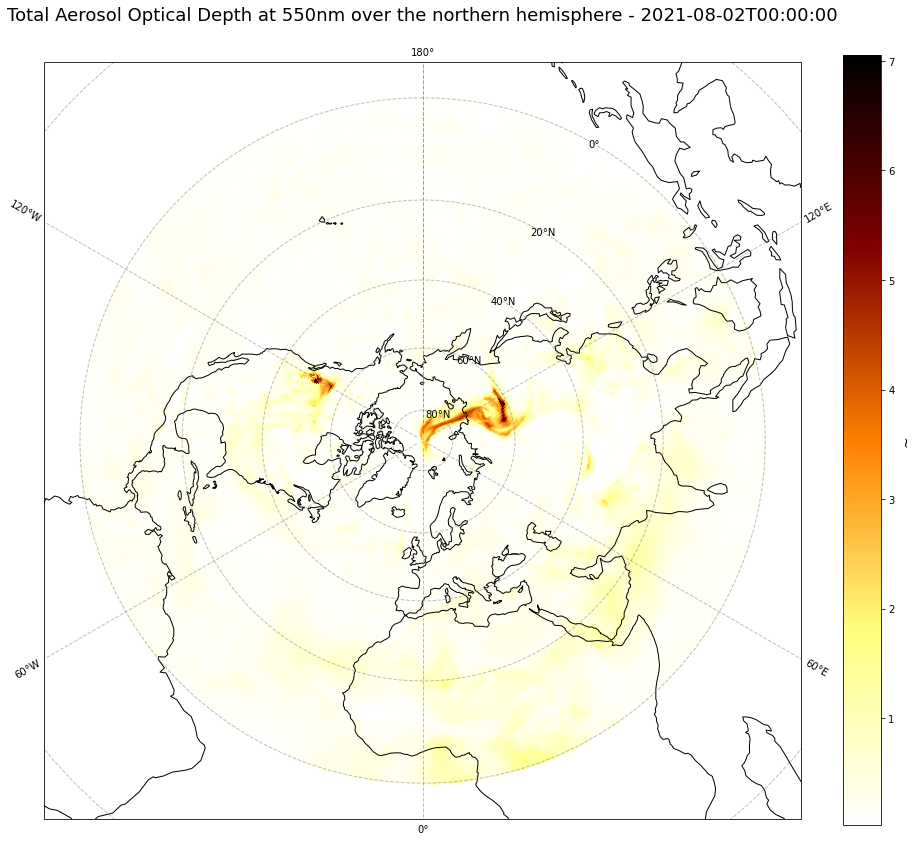

In [32]:
# Index of analysis step
time_index = 2

# Initiate a matplotlib figure
fig = plt.figure(figsize=(15,15))
ax = plt.subplot(1,1,1, projection=ccrs.Stereographic(central_latitude=90))

# Plotting function with pcolormesh
im = plt.pcolormesh(aod550['longitude'].values, aod550['latitude'].values,
                    aod550[time_index,:,:], cmap='afmhot_r', transform=ccrs.PlateCarree())

# Define geographic extent of the map
#ax.set_extent([aod550.longitude.min(),aod550.longitude.max(),aod550.latitude.min(),aod550.latitude.max()], crs=ccrs.PlateCarree())

# Add additional features such as coastlines, grid and colorbar
ax.coastlines(color='black')
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
cbar = plt.colorbar(im,fraction=0.046, pad=0.05)
cbar.set_label(aod550_unit, fontsize=14)


# Set the title of the plot
ax.set_title(aod550_long_name + ' over the northern hemisphere - ' + str(aod550.time[time_index].values)[:-10]+'\n', fontsize=18)

<br>

### 4. Animate 12-hour Total AOD at 550nm analysis over the northern hemisphere from 1 to 8 August 2021

In the last step, you can animate the `Total AOD at 550nm` in order to see how the trace gas develops over a period of eight days, from 1 to 8 August 2021.
You can do animations with matplotlib's function `animation`. Jupyter's function `HTML` can then be used to display HTML and video content.

The animation function consists of 4 parts:
- **Setting the initial state:**<br>
 Here, you define the general plot your animation shall use to initialise the animation. You can also define the number of frames (time steps) your animation shall have.
 
 
- **Functions to animate:**<br>
 An animation consists of three functions: `draw()`, `init()` and `animate()`. `draw()` is the function where individual frames are passed on and the figure is returned as image. In this example, the function redraws the plot for each time step. `init()` returns the figure you defined for the initial state. `animate()` returns the `draw()` function and animates the function over the given number of frames (time steps).
 
 
- **Create a `animate.FuncAnimation` object:** <br>
 The functions defined before are now combined to build an `animate.FuncAnimation` object.
 
 
- **Play the animation as video:**<br>
 As a final step, you can integrate the animation into the notebook with the `HTML` class. You take the generate animation object and convert it to a HTML5 video with the `to_html5_video` function

In [ ]:
# Setting the initial state:
# 1. Define figure for initial plot
fig = plt.figure(figsize=(15,15))
ax = plt.subplot(1,1,1, projection=ccrs.Stereographic(central_latitude=90))

# Plotting function with pcolormesh
im = plt.pcolormesh(aod550['longitude'].values, aod550['latitude'].values,
                    aod550[time_index,:,:], cmap='afmhot_r', transform=ccrs.PlateCarree())

ax.coastlines(color='black')
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
cbar = plt.colorbar(im,fraction=0.046, pad=0.05)
cbar.set_label(aod550_unit, fontsize=14)


# Set the title of the plot
ax.set_title(aod550_long_name + ' over the northern hemisphere - ' + str(aod550.time[time_index].values)[:-10]+'\n', fontsize=18)

frames = 15


def draw(i):
    img = plt.pcolormesh(aod550.longitude, 
                         aod550.latitude, 
                         aod550[i,:,:], 
                         cmap='afmhot_r', 
                         transform=ccrs.PlateCarree(),
                         vmin=0,
                         vmax=7,
                         shading='auto')
    
    ax.set_title(aod550_long_name + ' '+ str(aod550.time[i].data)[:-10], fontsize=18, pad=20.0)
    return img


def init():
    return fig


def animate(i):
    return draw(i)

ani = animation.FuncAnimation(fig, animate, frames, interval=500, blit=False,
                              init_func=init, repeat=True)

HTML(ani.to_html5_video())
plt.close(fig)

<br>

**Play the animation video as HTML5 video**

In [43]:
HTML(ani.to_html5_video())

<br>

The animation clearly shows the high values of Total Aerosol Optical Depth originating from the many different wildfires burning across North America in this period. This includes the Dixie fire, which, by August 6, had grown to become the largest single (i.e. non-complex) wildfire in California's history, and the second-largest wildfire overall. 

The animation also shows these high values crossing the continent to the east coast where it strongly affected local air quality.

<br>

<hr>

<p></p>
<span style='float:right'><p style=\"text-align:right;\">This project is licensed under <a href="./LICENSE">APACHE License 2.0</a>. | <a href=\"https://github.com/ecmwf-projects/copernicus-training">View on GitHub</a></span>